In [1]:
import tweepy #used to work with Twitter's API
import webbrowser
import time
import pandas as pd
import datetime 
import numpy as np
import matplotlib.pyplot as plt
import re
import json
from tweepy import API 
from tweepy import Cursor
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream

In [2]:
consumer_key = "jzn0NU9EviCRRbONbUXX9a8VN" #pulled from developer account for Twitter
consumer_secret = "ULsKu9BjBPmZ3yY5NdS6EXUhGBNWKUWxtwKqFktBeqsOq1Y3ZQ" #pulled from developer account for Twitter
#key and secret is generated by Twitter developer account
accessToken = '781482721-6928Gtnj95bK82PW3fYDxHFvU5T4l3SPI4VVF1X2'
accessTokenSecret = 'fTxclLJ4oxEmqshRhSbBibGoUiNq1l6941C0VyREdTf41'
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

# Starts extraction of different views of data pulled from a twitter user's account

In [3]:
def extract_timeline_as_df(timeline_list):
    columns = set()
    allowed_types = [str, int]
    tweets_data = []
    for status in timeline_list:
        status_dict = dict(vars(status))
        keys = status_dict.keys()
        single_tweet_data = {"user": status.user.screen_name, "author": status.author.screen_name}
        for k in keys:
            try:
                v_type = type(status_dict[k])
            except:
                v_type = None
            if v_type != None:
                if v_type in allowed_types:
                    single_tweet_data[k] = status_dict[k]
                    columns.add(k)
        tweets_data.append(single_tweet_data)


    header_cols = list(columns)
    header_cols.append("user")
    header_cols.append('author')
    df = pd.DataFrame(tweets_data, columns=header_cols)
    return df

### Change screen_name variable if needed to see different results of a different twitter user

In [4]:
screen_name = "@code" #change if needed 

# fetching the statuses
user_timeline = api.user_timeline(screen_name, count=201)#tweet count limit is 200
df1 = extract_timeline_as_df(user_timeline)
print(df1)


                                       source_url  in_reply_to_user_id  \
0                              https://buffer.com                  NaN   
1    https://about.twitter.com/products/tweetdeck           26228734.0   
2                      https://mobile.twitter.com                  NaN   
3    https://about.twitter.com/products/tweetdeck                  NaN   
4                              https://buffer.com                  NaN   
..                                            ...                  ...   
195                            https://buffer.com                  NaN   
196  https://about.twitter.com/products/tweetdeck                  NaN   
197                            https://buffer.com                  NaN   
198                    https://mobile.twitter.com          579290728.0   
199                    https://mobile.twitter.com          237521593.0   

    in_reply_to_status_id_str in_reply_to_user_id_str quoted_status_id_str  \
0                         NaN    

In [5]:
screen_name = "@code" #change if needed 
user = api.get_user(screen_name)
user_timeline = user.timeline() 
df1 = extract_timeline_as_df(user_timeline) #recent tweets are pulled in the spreadsheet
df1.head(201)

,source_url,in_reply_to_user_id,in_reply_to_status_id_str,in_reply_to_user_id_str,quoted_status_id_str,lang,source,quoted_status_id,in_reply_to_screen_name,retweet_count,in_reply_to_status_id,favorite_count,id_str,text,id,user,author
0,https://buffer.com,NaN,NaN,NaN,1421095510056869888,en,Buffer,1.421096e+18,NaN,25,NaN,0,1422316531719999489,"RT @nthonyChu: On this week’s Azure Friday, I ...",1422316531719999489,code,code
1,https://about.twitter.com/products/tweetdeck,2.622873e+07,1421988301829939200,26228734,NaN,en,TweetDeck,NaN,magnetikonline,0,1.421988e+18,8,1422308848220704772,@magnetikonline Been around for a while :) but...,1422308848220704772,code,code
2,https://mobile.twitter.com,NaN,NaN,NaN,NaN,en,Twitter Web App,NaN,NaN,5,NaN,0,1422308413736988672,RT @ospfranco: On @code you can conditionally ...,1422308413736988672,code,code
3,https://about.twitter.com/products/tweetdeck,NaN,NaN,NaN,NaN,en,TweetDeck,NaN,NaN,34,NaN,0,1422298987328114694,RT @codeSTACKr: vs @code has browser dev tools...,1422298987328114694,code,code
4,https://buffer.com,NaN,NaN,NaN,NaN,en,Buffer,NaN,NaN,10,NaN,55,1422267135733161987,On Thursday's VS Code livestream we're talking...,1422267135733161987,code,code
5,https://buffer.com,NaN,NaN,NaN,NaN,en,Buffer,NaN,NaN,3,NaN,0,1422242417017860100,RT @mattstratton: If you missed me as a guest ...,1422242417017860100,code,code
6,https://about.twitter.com/products/tweetdeck,NaN,NaN,NaN,NaN,en,TweetDeck,NaN,NaN,7,NaN,0,1420766812443222017,RT @hubacekjirka: Thanks @code for the tips! L...,1420766812443222017,code,code
7,https://buffer.com,NaN,NaN,NaN,NaN,en,Buffer,NaN,NaN,9,NaN,55,1420396138176389121,We're about to go live with @mattstratton for ...,1420396138176389121,code,code
8,https://mobile.twitter.com,NaN,NaN,NaN,NaN,en,Twitter Web App,NaN,NaN,22,NaN,0,1420153422175670274,RT @LearnTV: It's not too late to save the dat...,1420153422175670274,code,code
9,https://buffer.com,NaN,NaN,NaN,1418642575838359552,en,Buffer,1.418643e+18,NaN,21,NaN,127,1419724263720984576,Here's another cool VS Code custom notebook ex...,1419724263720984576,code,code


List the interaction of the twitter user's account based on a statistical analysis of whom they replied to, the amount of favorite and retweets received, and how many times they interacted with another user. 

In [6]:
df1.describe()

,in_reply_to_user_id,quoted_status_id,retweet_count,in_reply_to_status_id,favorite_count,id
count,2.000000e+00,4.000000e+00,20.000000,2.000000e+00,20.000000,2.000000e+01
mean,1.596982e+09,1.418510e+18,30.700000,1.420325e+18,54.450000,1.419984e+18
std,2.221380e+09,2.203095e+15,31.484499,2.352129e+15,94.304923,1.732930e+15
min,2.622873e+07,1.415708e+18,0.000000,1.418662e+18,0.000000,1.417874e+18
25%,8.116052e+08,1.417872e+18,8.500000,1.419493e+18,0.000000,1.418570e+18
50%,1.596982e+09,1.418618e+18,21.500000,1.420325e+18,0.000000,1.419544e+18
75%,2.382358e+09,1.419256e+18,39.250000,1.421157e+18,68.500000,1.422249e+18
max,3.167735e+09,1.421096e+18,125.000000,1.421988e+18,360.000000,1.422317e+18


In [7]:
df1.shape

(20, 17)

In [8]:
df1.to_csv('tweetspreadsheet.csv', index=False)

In [9]:
df1_saved_file = pd.read_csv('tweetspreadsheet.csv')
df1_saved_file

,source_url,in_reply_to_user_id,in_reply_to_status_id_str,in_reply_to_user_id_str,quoted_status_id_str,lang,source,quoted_status_id,in_reply_to_screen_name,retweet_count,in_reply_to_status_id,favorite_count,id_str,text,id,user,author
0,https://buffer.com,NaN,NaN,NaN,1.421096e+18,en,Buffer,1.421096e+18,NaN,25,NaN,0,1422316531719999489,"RT @nthonyChu: On this week’s Azure Friday, I ...",1422316531719999489,code,code
1,https://about.twitter.com/products/tweetdeck,2.622873e+07,1.421988e+18,2.622873e+07,NaN,en,TweetDeck,NaN,magnetikonline,0,1.421988e+18,8,1422308848220704772,@magnetikonline Been around for a while :) but...,1422308848220704772,code,code
2,https://mobile.twitter.com,NaN,NaN,NaN,NaN,en,Twitter Web App,NaN,NaN,5,NaN,0,1422308413736988672,RT @ospfranco: On @code you can conditionally ...,1422308413736988672,code,code
3,https://about.twitter.com/products/tweetdeck,NaN,NaN,NaN,NaN,en,TweetDeck,NaN,NaN,34,NaN,0,1422298987328114694,RT @codeSTACKr: vs @code has browser dev tools...,1422298987328114694,code,code
4,https://buffer.com,NaN,NaN,NaN,NaN,en,Buffer,NaN,NaN,10,NaN,55,1422267135733161987,On Thursday's VS Code livestream we're talking...,1422267135733161987,code,code
5,https://buffer.com,NaN,NaN,NaN,NaN,en,Buffer,NaN,NaN,3,NaN,0,1422242417017860100,RT @mattstratton: If you missed me as a guest ...,1422242417017860100,code,code
6,https://about.twitter.com/products/tweetdeck,NaN,NaN,NaN,NaN,en,TweetDeck,NaN,NaN,7,NaN,0,1420766812443222017,RT @hubacekjirka: Thanks @code for the tips! L...,1420766812443222017,code,code
7,https://buffer.com,NaN,NaN,NaN,NaN,en,Buffer,NaN,NaN,9,NaN,55,1420396138176389121,We're about to go live with @mattstratton for ...,1420396138176389121,code,code
8,https://mobile.twitter.com,NaN,NaN,NaN,NaN,en,Twitter Web App,NaN,NaN,22,NaN,0,1420153422175670274,RT @LearnTV: It's not too late to save the dat...,1420153422175670274,code,code
9,https://buffer.com,NaN,NaN,NaN,1.418643e+18,en,Buffer,1.418643e+18,NaN,21,NaN,127,1419724263720984576,Here's another cool VS Code custom notebook ex...,1419724263720984576,code,code


In [10]:
# screen name of the account to be fetched
screen_name = "@code" #change if needed 
#will display last fetched tweet as the Twitter account's "Pinned Tweet" if they have a pinned tweet
  
# number of statuses to be fetched
count = 5
  
# fetching the statuses
statuses = api.user_timeline(screen_name, count = count)
  
# printing the statuses
for status in statuses:
    print(status.text, end = "\n\n") 

RT @nthonyChu: On this week’s Azure Friday, I joined @shanselman to talk about Azure Static Web Apps

🚀 Deploy a React app to @AzureStaticA…

@magnetikonline Been around for a while :) but it's a great feature! https://t.co/ZyVQ4NjLvC

RT @ospfranco: On @code you can conditionally break when debugging code, super useful if you have code that runs hundreds of times and fail…

RT @codeSTACKr: vs @code has browser dev tools, console, and built-in #javascript debugging!! 🤯 https://t.co/WT1KLoloyr

On Thursday's VS Code livestream we're talking with @damovisa about using @GitHub with @Code 📺 Whether you're a beg… https://t.co/uHtaealPBo



### User enters in hashtag to pull top 10 tweet interaction of that hashtag

In [11]:
#search_words = ["#covid19", "2020", "lockdown"]
key_word = input("Enter hashtag to  pull from Twitter: ")#'@code' #searches all tweets that reference the key_word specified 
date_since = input("Enter date with 7 days of running this code, date format is YYYY-MM-DD: ")#Examle of date format 2021-06-21

tweets = tweepy.Cursor(api.search, key_word, geocode="38.892062,-77.019912,3000km", lang="en", since=date_since).items(10)
## the geocode is for Washington, DC; format for geocode="lattitude,longitude,radius"
## radius should be in miles or km
#items references the number of tweets to pull 


for tweet in tweets:
    print("created_at: {}\nuser: {}\ntweet text: {}\ngeo_location: {}".
            format(tweet.created_at, tweet.user.screen_name, tweet.text, tweet.user.location))
    print("\n")
## tweet.user.location will give you the general location of the user and not the particular location for the tweet itself, as it turns out, most of the users do not share the exact location of the tweet

Enter hashtag to  pull from Twitter: @code
Enter date with 7 days of running this code, date format is YYYY-MM-DD: 2021-07-31
created_at: 2021-08-02 22:40:02
user: seflless
tweet text: @Tyriar @code Awesome thanks for the info. Had book marked some VS Code extension testing articles.
geo_location: Boston


created_at: 2021-08-02 22:09:47
user: orlalara
tweet text: @PorterHaus_ @ospfranco @code You need both:
1. A font that support ligatures
2. enable font ligatures in settings.… https://t.co/0LbmB5i1Hz
geo_location: Venezuela


created_at: 2021-08-02 21:15:15
user: westurner
tweet text: @semanticarts @richdijkstra @Abebab @taronish @micheldumontier @SjoerdvanHoorn @jervenbolleman @ProjectJupyter… https://t.co/UrL16vNDqm
geo_location: USA


created_at: 2021-08-02 21:10:38
user: CommonAccord
tweet text: @iang_fc @mZargham @abcoathup @lex_node @AFDudley0 @rariblecom @StuartSmolen @nicksdjohnson @ChrisCatoya @StewieKee… https://t.co/igtmAN4AY9
geo_location: Boston


created_at: 2021-08-02 

In [12]:
#searches all relevant tweet as specified from date range 
print("Date format is as follows: Year-Month-Day= 0000-00-00")
print("Date range must be within a 7 day range")
date_since = input("Enter beginging date, YYYY-MM-DD: ") # Example 2021-06-14
date_until = input("Enter last date, YYYY-MM-DD: ")# Example 2021-06-21 
tweets = tweepy.Cursor(api.search, geocode="38.892062,-77.019912,3000km", lang="en", q= "@code", since=date_since,until=date_until).items(10) #'olympic'
#If want different user, change q= input("Enter key word to search through Twitter's API of relevant Tweets: ")
for tweet in tweets:         
    print (tweet.text)  

Date format is as follows: Year-Month-Day= 0000-00-00
Date range must be within a 7 day range
Enter beginging date, YYYY-MM-DD: 2021-07-31
Enter last date, YYYY-MM-DD: 2021-07-31


In [13]:
for status in tweepy.Cursor(api.user_timeline, screen_name=screen_name, tweet_mode="extended").items(10): 
    print(status.full_text)

RT @nthonyChu: On this week’s Azure Friday, I joined @shanselman to talk about Azure Static Web Apps

🚀 Deploy a React app to @AzureStaticA…
@magnetikonline Been around for a while :) but it's a great feature! https://t.co/ZyVQ4NjLvC
RT @ospfranco: On @code you can conditionally break when debugging code, super useful if you have code that runs hundreds of times and fail…
RT @codeSTACKr: vs @code has browser dev tools, console, and built-in #javascript debugging!! 🤯 https://t.co/WT1KLoloyr
On Thursday's VS Code livestream we're talking with @damovisa about using @GitHub with @Code 📺 Whether you're a beginner with Git &amp; GitHub or an experienced dev looking to get more productive, this is your chance to learn! 📚
Add to calendar 👉 https://t.co/DPze49WGS6 https://t.co/XUYPljP8al
RT @mattstratton: If you missed me as a guest on the @code stream earlier today with @burkeholland, you can check it out here! https://t.co…
RT @hubacekjirka: Thanks @code for the tips! Love the @gitlens toolti

In [14]:
class TwitterClient():
    def __init__(self, twitter_user=None):
        self.auth = TwitterAuthenticator().authenticate_twitter_app()
        self.twitter_client = API(self.auth)

        self.twitter_user = twitter_user

    def get_twitter_client_api(self):
        return self.twitter_client

    def get_user_timeline_tweets(self, num_tweets):
        tweets = []
        for tweet in Cursor(self.twitter_client.user_timeline, id=self.twitter_user).items(num_tweets):
            tweets.append(tweet)
        return tweets

    def get_friend_list(self, num_friends):
        friend_list = []
        for friend in Cursor(self.twitter_client.friends, id=self.twitter_user).items(num_friends):
            friend_list.append(friend)
        return friend_list

    def get_home_timeline_tweets(self, num_tweets):
        home_timeline_tweets = []
        for tweet in Cursor(self.twitter_client.home_timeline, id=self.twitter_user).items(num_tweets):
            home_timeline_tweets.append(tweet)
        return home_timeline_tweets

In [15]:
class TwitterAuthenticator():

    def authenticate_twitter_app(self):
        consumerKey = 'jzn0NU9EviCRRbONbUXX9a8VN'
        consumerSecret = 'ULsKu9BjBPmZ3yY5NdS6EXUhGBNWKUWxtwKqFktBeqsOq1Y3ZQ'
        accessToken = '781482721-6928Gtnj95bK82PW3fYDxHFvU5T4l3SPI4VVF1X2'
        accessTokenSecret = 'fTxclLJ4oxEmqshRhSbBibGoUiNq1l6941C0VyREdTf41'
        auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
        auth.set_access_token(accessToken, accessTokenSecret)
        return auth

# # # # TWITTER STREAMER # # # #
class TwitterStreamer():
    """
    Class for streaming and processing live tweets.
    """
    def __init__(self):
        self.twitter_autenticator = TwitterAuthenticator()    

    def stream_tweets(self, fetched_tweets_filename, hash_tag_list):
        # This handles Twitter authetification and the connection to Twitter Streaming API
        listener = TwitterListener(fetched_tweets_filename)
        auth = self.twitter_autenticator.authenticate_twitter_app() 
        stream = Stream(auth, listener)

        # This line filter Twitter Streams to capture data by the keywords: 
        stream.filter(track=hash_tag_list)

In [16]:
class TweetAnalyzer():
    """
    Functionality for analyzing and categorizing content from tweets.
    """
    def tweets_to_data_frame(self, tweets):
        df = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['tweets'])

        df['id'] = np.array([tweet.id for tweet in tweets])
        df['len'] = np.array([len(tweet.text) for tweet in tweets])
        df['date'] = np.array([tweet.created_at for tweet in tweets])
        df['source'] = np.array([tweet.source for tweet in tweets])
        df['likes'] = np.array([tweet.favorite_count for tweet in tweets])
        df['retweets'] = np.array([tweet.retweet_count for tweet in tweets])

        return df

Takes the user's entered Twitter account name and gives results of the total amount of tweets and their interactions.

In [17]:
if __name__ == '__main__':

    twitter_client = TwitterClient()
    tweet_analyzer = TweetAnalyzer()

    api = twitter_client.get_twitter_client_api()
    screen_name = "@code" #input("Enter twitter user name to find timeline data: ")
    tweets = api.user_timeline(screen_name, count=20) #=input("Enter twitter user name to find timeline data: "

    #print(dir(tweets[0]))
    #print(tweets[0].retweet_count)

    df = tweet_analyzer.tweets_to_data_frame(tweets)

    # Get average length over all tweets:
    print('Number of Tweets total: %s' % np.mean(df['len']))

    # Get the number of likes for the most liked tweet:
    print('Number of Likes total: %s' % np.max(df['likes']))

    # Get the number of retweets for the most retweeted tweet:
    print('Number of Retweets total: %s' % np.max(df['retweets'])) #'Number of Retweets: ' %s 
    
    print(df.head(21))

Number of Tweets total: 125.95
Number of Likes total: 360
Number of Retweets total: 125
                                               tweets                   id  \
0   RT @nthonyChu: On this week’s Azure Friday, I ...  1422316531719999489   
1   @magnetikonline Been around for a while :) but...  1422308848220704772   
2   RT @ospfranco: On @code you can conditionally ...  1422308413736988672   
3   RT @codeSTACKr: vs @code has browser dev tools...  1422298987328114694   
4   On Thursday's VS Code livestream we're talking...  1422267135733161987   
5   RT @mattstratton: If you missed me as a guest ...  1422242417017860100   
6   RT @hubacekjirka: Thanks @code for the tips! L...  1420766812443222017   
7   We're about to go live with @mattstratton for ...  1420396138176389121   
8   RT @LearnTV: It's not too late to save the dat...  1420153422175670274   
9   Here's another cool VS Code custom notebook ex...  1419724263720984576   
10  📺 This Wednesday, @mattstratton is joining us ... 

Text(0.5, 1.0, 'Twitter User @code Likes & Retweets chart')

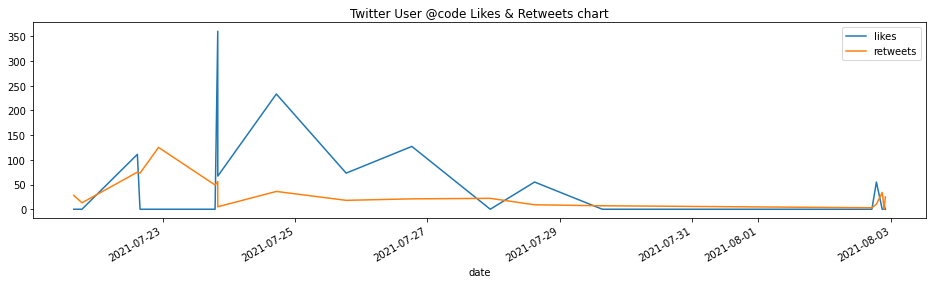

In [18]:
#Line Chart of twitter user's likes and retweets
time_likes = pd.Series(data=df['likes'].values, index=df['date'])
time_likes.plot(figsize=(16, 4), label="likes", legend=True)

time_retweets = pd.Series(data=df['retweets'].values, index=df['date'])
time_retweets.plot(figsize=(16, 4), label="retweets", legend=True)
plt.title("Twitter User " + screen_name + " Likes & Retweets chart") 